In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import seaborn as sns

In [37]:
# Read the csv file
df_B = pd.read_csv("selected_diagnosis_6.csv")
df_B.head()

,Radius mean,Texture mean,Smoothness mean,Compactness mean,Diagnosis
0,20.57,17.77,0.08474,0.07864,M
1,19.69,21.25,0.10960,0.15990,M
2,11.42,20.38,0.14250,0.28390,M
3,20.29,14.34,0.10030,0.13280,M
4,12.45,15.70,0.12780,0.17000,M


In [38]:
# sns.pairplot(df_B, hue="Diagnosis")

In [39]:
# Prepare target data
target = df_B["Diagnosis"]
target_names = ["malignant", "benigh"]
target_B = target.map({'M': 1, 'B': 0})
target_B.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [40]:
# Prepare feature data
data_B = df_B.drop("Diagnosis", axis=1)
feature_names_B = data_B.columns
data_B.head()

,Radius mean,Texture mean,Smoothness mean,Compactness mean
0,20.57,17.77,0.08474,0.07864
1,19.69,21.25,0.10960,0.15990
2,11.42,20.38,0.14250,0.28390
3,20.29,14.34,0.10030,0.13280
4,12.45,15.70,0.12780,0.17000


In [41]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_B, target_B, random_state=42)

In [42]:
# StandardScaler, we use it when we don't know everything about the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [43]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# Support Vector Machine

In [44]:
# Import Support vector machine linear classifier
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# Model Accuracy
print("Test Acc: %.3f" % model.score(X_test, y_test))

Test Acc: 0.923


In [46]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                           target_names=target_names))

             precision    recall  f1-score   support

  malignant       0.91      0.97      0.94        87
     benigh       0.94      0.85      0.90        55

avg / total       0.92      0.92      0.92       142



# Logistic Regression

In [47]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Fit the model to the training set
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Calculate the scores for the training and test sets
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.931924882629108
Test Score: 0.9154929577464789


In [50]:
predictions = classifier.predict(X_test)

print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions: [1 0 1 0 0 0 0 1 1 0]
First 10 Actual labels: [1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [51]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


# K Nearest Neighbor

k: 1, Train/Test Score: 1.000/0.873
k: 3, Train/Test Score: 0.953/0.880
k: 5, Train/Test Score: 0.958/0.887
k: 7, Train/Test Score: 0.948/0.908
k: 9, Train/Test Score: 0.944/0.887
k: 11, Train/Test Score: 0.944/0.887
k: 13, Train/Test Score: 0.946/0.894
k: 15, Train/Test Score: 0.944/0.901
k: 17, Train/Test Score: 0.941/0.915
k: 19, Train/Test Score: 0.946/0.908


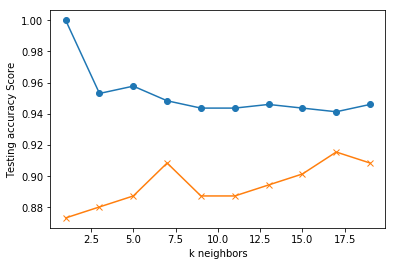

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores =[]
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker="o")
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
# k = 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("k=7 Test Acc: %.3f" % knn.score(X_test, y_test))

k=7 Test Acc: 0.852


# Decision Tree & Random Forest

In [20]:
from sklearn import tree

# Create a decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7887323943661971

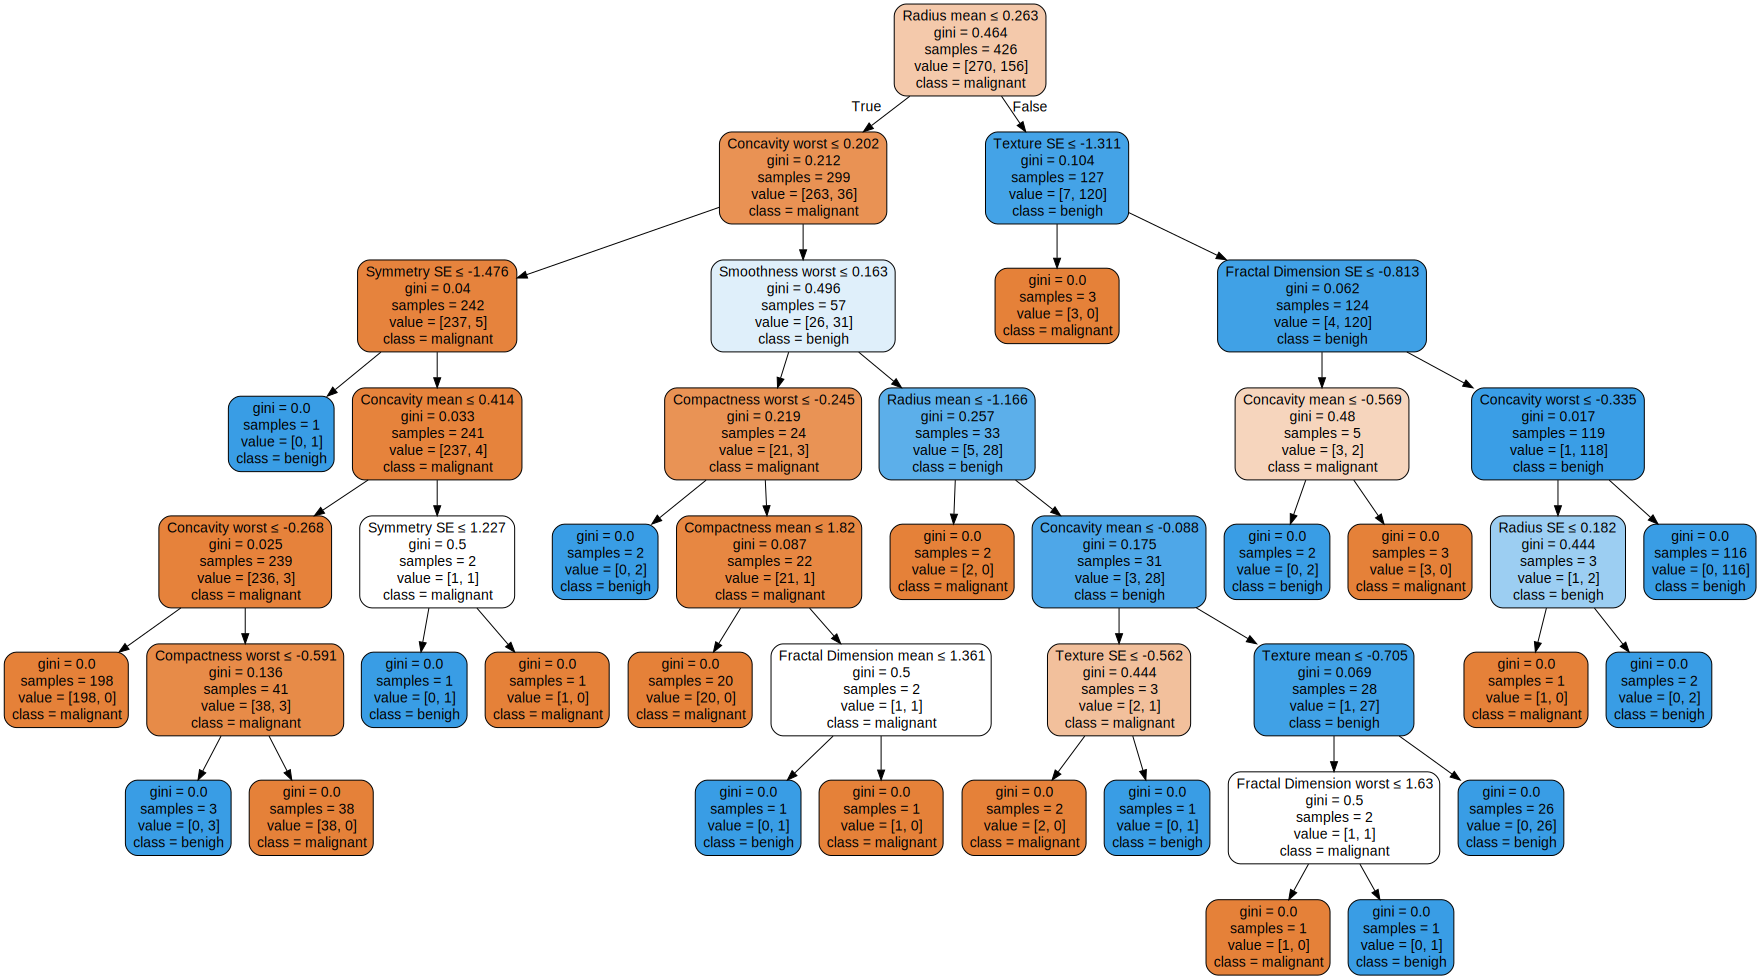

In [20]:
# Use graphviz to visualize the tree
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names = feature_names_B,
    class_names = target_names,
    filled=True, rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [53]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8943661971830986

In [54]:
# Sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names_B), reverse=True)

[(0.5548064406366293, 'Radius mean'),
 (0.20176408556416037, 'Compactness mean'),
 (0.158536990017135, 'Texture mean'),
 (0.08489248378207552, 'Smoothness mean')]

# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[84,  3],
       [ 8, 47]])

In [58]:
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.9154929577464789
Test Score: 0.9225352112676056


# Deep Learning

In [59]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [60]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=4))
model.add(Dense(units=2, activation='softmax'))

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 14        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
# Fit the model to the training data
model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.6071 - acc: 0.7066
Epoch 2/100
 - 0s - loss: 0.5876 - acc: 0.7183
Epoch 3/100
 - 0s - loss: 0.5697 - acc: 0.7300
Epoch 4/100
 - 0s - loss: 0.5522 - acc: 0.7394
Epoch 5/100
 - 0s - loss: 0.5350 - acc: 0.7465
Epoch 6/100
 - 0s - loss: 0.5183 - acc: 0.7700
Epoch 7/100
 - 0s - loss: 0.5020 - acc: 0.7887
Epoch 8/100
 - 0s - loss: 0.4862 - acc: 0.8005
Epoch 9/100
 - 0s - loss: 0.4709 - acc: 0.8122
Epoch 10/100
 - 0s - loss: 0.4558 - acc: 0.8192
Epoch 11/100
 - 0s - loss: 0.4408 - acc: 0.8310
Epoch 12/100
 - 0s - loss: 0.4265 - acc: 0.8357
Epoch 13/100
 - 0s - loss: 0.4122 - acc: 0.8380
Epoch 14/100
 - 0s - loss: 0.3984 - acc: 0.8451
Epoch 15/100
 - 0s - loss: 0.3852 - acc: 0.8474
Epoch 16/100
 - 0s - loss: 0.3723 - acc: 0.8638
Epoch 17/100
 - 0s - loss: 0.3594 - acc: 0.8662
Epoch 18/100
 - 0s - loss: 0.3478 - acc: 0.8779
Epoch 19/100
 - 0s - loss: 0.3362 - acc: 0.8826
Epoch 20/100
 - 0s - loss: 0.3253 - acc: 0.8826
Epoch 21/100
 - 0s - loss: 0.3151 - acc: 0.8897
E

For this network, we simply add an additional hidden layer of 6 nodes

In [64]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=4))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [65]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 14        
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [66]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.6934 - acc: 0.5986
Epoch 2/100
 - 0s - loss: 0.6759 - acc: 0.6901
Epoch 3/100
 - 0s - loss: 0.6605 - acc: 0.7441
Epoch 4/100
 - 0s - loss: 0.6419 - acc: 0.7840
Epoch 5/100
 - 0s - loss: 0.6195 - acc: 0.8052
Epoch 6/100
 - 0s - loss: 0.5900 - acc: 0.8427
Epoch 7/100
 - 0s - loss: 0.5521 - acc: 0.8592
Epoch 8/100
 - 0s - loss: 0.5084 - acc: 0.8709
Epoch 9/100
 - 0s - loss: 0.4650 - acc: 0.8756
Epoch 10/100
 - 0s - loss: 0.4229 - acc: 0.8803
Epoch 11/100
 - 0s - loss: 0.3883 - acc: 0.8873
Epoch 12/100
 - 0s - loss: 0.3570 - acc: 0.8897
Epoch 13/100
 - 0s - loss: 0.3302 - acc: 0.8991
Epoch 14/100
 - 0s - loss: 0.3080 - acc: 0.8967
Epoch 15/100
 - 0s - loss: 0.2888 - acc: 0.8991
Epoch 16/100
 - 0s - loss: 0.2720 - acc: 0.9061
Epoch 17/100
 - 0s - loss: 0.2572 - acc: 0.9061
Epoch 18/100
 - 0s - loss: 0.2443 - acc: 0.9061
Epoch 19/100
 - 0s - loss: 0.2335 - acc: 0.9085
Epoch 20/100
 - 0s - loss: 0.2239 - acc: 0.9155
Epoch 21/100
 - 0s - loss: 0.2149 - acc: 0.9155
E

# Compare the models below

In [67]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.22991307111273349, Accuracy: 0.9225352087490996


In [68]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.2779575164469195, Accuracy: 0.9084507017068459
